# Multivariate Statistical Visualizations With Seaborn

## Objectives:

* Understand the describe the use cases for multivariate visualizations
* Create and customize 2d scatter plots using python and seaborn and add extra dimensions with hue. 
* Create correlation matrices from datasets for plotting heatmaps in seaborn.
* Create parallel coordinate plots in pandas from dataframes and apply normalization for visual clarity. 


## Statistical Visualization for Multivariate Data

In the previous section, we looked at how to plot a single variable using seaborn's univariate plotting features. This lesson shows how to visualize multivariate data using various statistical plotting techniques in seaborn and pandas. 

Bivariate statistical analyses involve only two variables including a predictor variable and a response variable. Such data are easy to visualize using 2d scatter plots, bivariate histograms, boxplots. It's also possible to visualize trivariate data with 3D scatter plots, or 2D scatter plots with a third variable encoded with color etc. However, many datasets involve a larger number of variables, making direct visualization more difficult. This lesson explores some of the ways to visualize high-dimensional data in Python, Pandas and Seaborn. Let's start with scatter plots.

### Scatter Plots

Seaborn is a great tool for plotting statistical relationships between continuous variables . Let's consider plotting a scatter plot for our data. **Scatterplots**, as we briefly saw in our introductory lessons and labs, display the values of 2 sets of data on 2 dimensions. Each dot represents an observation. The position on the X (horizontal) and Y (vertical) axis represents the values of the 2  variables. These are useful to study the correlation (measure of similarity)between different variables as we can recognise patterns in a scatter plot as shown below:

![](corr2.png)

It is common to provide even more information using colors or shapes (to show groups, or a third variable). 

In seaborn, making a scatter plot is just one line of code using the `lmplot()` function.let's compare the `sepal_length` and `sepal_width` features for our dataset. Let's load necessary library and iris dataset as earlier to explore this in detail:

In [ ]:
# Import necessary libraries for plotting 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Load iris dataset
iris = sns.load_dataset('iris')

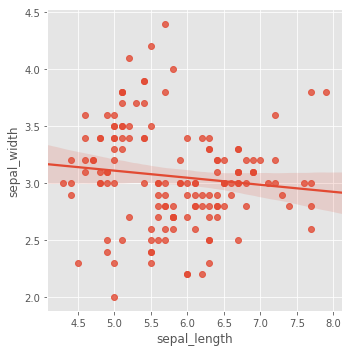

In [6]:
# Plot scatterplot between sepal_length and speal_width
sns.lmplot(x='sepal_length', y='sepal_width', data=iris);

### Customizing scatter plots in Seaborn

The plot above shows a linear regression line fit which is something not required for standard scatter plots. We can pass in a `fit_reg=False` argument to the plotting function to remove it from the plot as shown below:

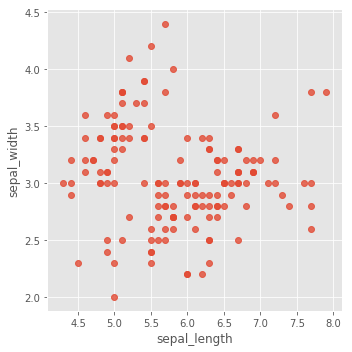

In [76]:
sns.lmplot(x='sepal_length', 
           y='sepal_width', 
           data=iris, 
           fit_reg=False);

### Adding a third dimension to scatter plots

Another customizatin that we can apply to this scatter plot is to add a new dimension by changing color (hue) of the dots on the scatter plot to show their class (type of flower). Let's see this in action. We need to set `hue` parameter equal to `species` feature of the data to identify each data element's class. 

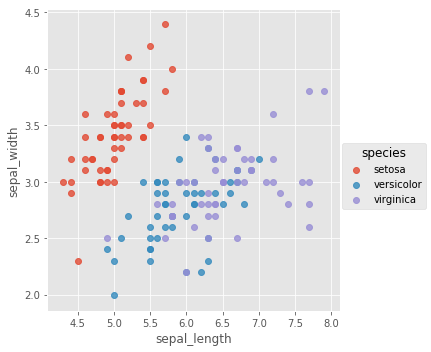

In [77]:
sns.lmplot(x='sepal_length', 
           y='sepal_width', 
           data=iris, 
           fit_reg=False,
           hue='species');

Here we can see how custom colors are added to the plot to highlight the third dimension, and a legend is automatically added to the output. Matplotlib might need a few lines of code to achieve this functionality. We can, however, use matplotlib on top of seaborn visualizations for further tweaking, e.g. setting x and y axes limits using `plt.xlim()` and `plt.ylim()`. We can also disable the legend shown by seaborn and use matplotlib for showing legends as we saw in previous labs. Let's change the legend and axes for the plot above. 

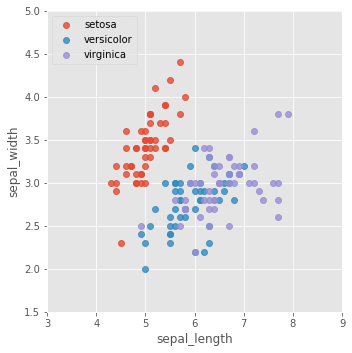

In [22]:
sns.lmplot(x='sepal_length', 
           y='sepal_width', 
           data=iris, 
           fit_reg=False,
           hue='species',
           legend=False) # Disable seaborn legend

# Tweak using Matplotlib
plt.ylim(1.5, 5)
plt.xlim(3, 9)
plt.legend(loc=2)
plt.show()

This is excellent, so we can use seaborn's plots which are very good by default and can further custoize them with matplotlib functions. The plot above allows us to inspect the distribution of two variables with respect to each other and also with respect the the classes in the responce variable. Let's carry on and see some more multivariate statistical visualizations. 

## Heatmaps

It is often difficult to show many dimensions onto a plot without hurting its interpretability. Very busy plots are naturally very hard to interpret. Hence highly multivariate visualizations might be be difficult to use. One way around this problem is to use summarization. Summarization is the creation and addition of new variables by mixing and matching the information provided in the old ones.

A heatmap (or a correlation plot) is probably the most heavily used summarized visualization, in which measures the correlation between every pair of values in a dataset and plots a result in color. Heatmaps use a system of color-coding to represent different values. 

In order to calculate a heatmap, we need to perform following actions:

* Select the variables to be visualized and create a new dataset containing only these variables.
* Drop Null values with panda's `.dropna()`.
* Calculate the the correlation co-efficient (measure of similarity) between variables using pandas `.corr()` method. 


In [49]:
iris_corr= (iris.loc[:, ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
        .dropna())\
        .corr()

iris_corr

,petal_length,petal_width,sepal_length,sepal_width
petal_length,1.000000,0.962865,0.871754,-0.428440
petal_width,0.962865,1.000000,0.817941,-0.366126
sepal_length,0.871754,0.817941,1.000000,-0.117570
sepal_width,-0.428440,-0.366126,-0.117570,1.000000


The correlation matrix above is a table containing the correlation coefficients between each variable found in the dataset. 

*A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables.They all assume values in the range from −1 to +1, where +1 indicates the strongest possible agreement and −1 the strongest possible disagreement.*[(wiki)](https://en.wikipedia.org/wiki/Correlation_coefficient)

We can pass this correlation matrix to seaborn's `.heatmap()` function to visually inspect it. This is be very beneficial when you have a large numbers of variables and pairwise comparison may take too long to compute and conclude. The color-coding used by heatmaps provide quick visual cues to identify variables that are positively or negatively correlated i.e. cold and hot regions of a heatmap. 

Let's plot the heatmap for above matrix. We shall also pass in `annot=True` for showing the correlation values on the the plot as annotations, and `fmt=".1f"` (string formatting code)for showing values up to a single decimal place. Detailedlist of arguments that can be passed in for customization can be viewed [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

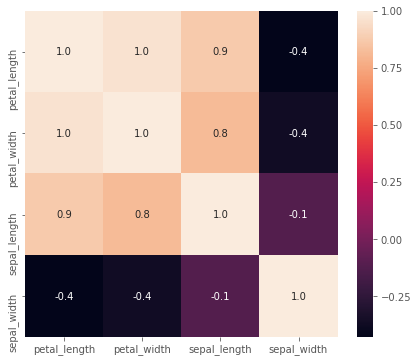

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)

# Plot the heatmap for computer correlation matrix
sns.heatmap(iris_corr, annot=True, fmt=".1f")

Each cell in this plot is the intersection of two variables shown on the axes. The color and label together indicate the amount of correlation between the two variables . For example, in this dataset petal_length and sepal_length are highly correlated, while sepal_length and sepal_width are very uncorrelated. A variable's correlation to itself is always equal to 1. 

## Parallel co-ordinate plot

Parallel co-ordinate plots are used for plotting multivariate, numerical data for comparing many variables together and seeing the relationships between them. 

In a Parallel Coordinates Plot, each variable is given its own axis and all the axes are placed in parallel to each other. Each axis can have a different scale, as each variable works off a different unit of measurement, or all the axes can be normalised to keep all the scales uniform. Values are plotted as a series of lines that connected across all the axes. This means that each line is a collection of points placed on each axis, that have all been connected together. A example of a simple parallel plot is given in the picture below. 

<img src="parallel_coordinates.svg", width=300>


The order the axes are arranged has huge impact on how reader understands the data. This is because the relationships between adjacent variables are easier to perceive, then for non-adjacent variables. So re-ordering the axes can help in discovering patterns or correlations across variables.

Pandas has a built in handy module for plotting parallel co-ordinate plots called `parellel_coordinates`. Let's import this first from pandas plotting tools. 


In [53]:
from pandas.plotting import parallel_coordinates

We can now use `parallel-coordinate` function for plotting the desired visualization. We need to perform following tasks:
* Create a dataset with required variables, dropping Nan values as above.
* Set a color map (3 colors) to show the response variable.
* Create a new figure and set a suitable canvas size.
* Pass the new dataset to `parallel_coordinate()` function, along with an indication of of response variable for showing classes and color map created earlier as arguments.
* Label and title the plot. 

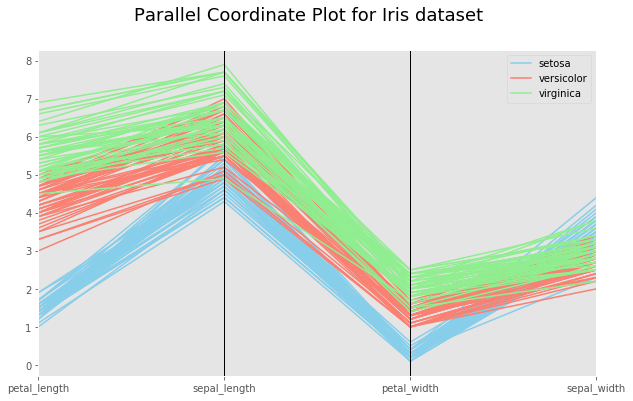

In [65]:
#Create dataset with required variables - Drop Nans
iris_pplt= (iris.loc[:, ['petal_length', 'sepal_length', 'petal_width', 'sepal_width', 'species']]
                .dropna())

# Set a colormap with3 colors to show species.
colormap = ('skyblue', 'salmon', 'lightgreen')

# Start a new figure
fig = plt.figure(figsize=(10, 6))

# Plot parallel coordinates and give a suitable title
parallel_coordinates(iris_pplt, 'species',color=colormap)
title = fig.suptitle("Parallel Coordinate Plot for Iris dataset", fontsize=18)

plt.show()

So the above plot shows that all three species are quite different in terms of their petal length. Sepal width has maximum overlap highlighting similarity in this variable.Due to different ranges of these variables, its really hard to inspect the level of overlap in this parallel plot. Let's normalize the variable values between 0 and 1 and see if it improves the quality of visual. We shall use the following formula for normalization:
>**Xi - Xmin / X.max - X.min**

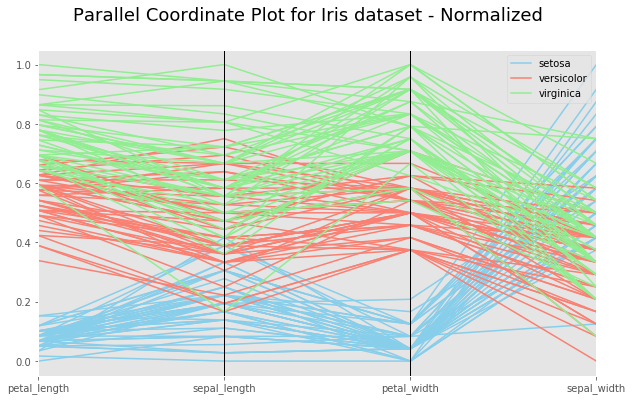

In [74]:
# Create a dataframe with ONLY numeric variables
iris_pplt = (iris.loc[:, ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']]
                .dropna())

#  Normalize the dataset with formula given above
iris_pplt_norm = (iris_pplt - iris_pplt.min()) / (iris_pplt.max() - iris_pplt.min())

# Join the response variable to normalized dataset
iris_pply_norm_response = iris_pplt_norm.join(iris.species)

# Start a new figure
fig = plt.figure(figsize=(10, 6))

# Plot parallel coordinates and give a suitable title
parallel_coordinates(iris_pply_norm_response, 'species',color=colormap)

title = fig.suptitle("Parallel Coordinate Plot for Iris dataset - Normalized", fontsize=18)

plt.show()

We can see that with normalization, it becomes much easier to visualize individual data elements in a parallel plot, and see how distinguishable different classes are in our data. The downside to Parallel Coordinates Plots, is that they can become over-cluttered when they are data-dense. Using interactive parallel plots may provide a solution for such datasets. 

## Summary 

In this lesson, we saw how to create statistical visualizations for inspecting relationships between more than one data elements. We used iris dataset to visualize scatter plots with color coding, created a correlation matrix and used this for plotting a heatmap and created parallel plots using panda's built in methods. The techniques learnt in this lesson are very useful towards performing exploratory data analysis in a data science project. 